In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.manifold import TSNE
import pickle
# from Bio.Cluster import kcluster
import os
import numpy as np
import yaml
import os
import pandas
from collections import Counter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sys
import seaborn as sns
# import pyclustering
from shutil import copyfile
import matplotlib as plt
# ------- SERVER EXTENSIONS ---------
lib =  r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/utilities/droplet_dataset'
lib2 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/utilities'
lib3 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/data_analysis'
lib4 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy'
lib5 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/scripts'
import sys
sys.path.append(lib)
sys.path.append(lib2)
sys.path.append(lib3)
sys.path.append(lib4)
sys.path.append(lib5)
# ------- SERVER EXTENSIONS ---------

Variance 0.315
Counts shape (89024, 4074)


Text(0.5, 1.0, 'Variance > 0.315, 4074 genes')

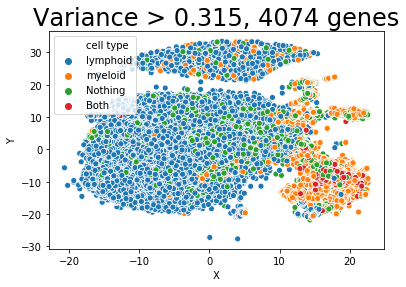

In [3]:
variance = 0.315
print(f"Variance {variance}")
filtered_cells_path = fr'/storage/md_keren/shitay/outputs/variance_filtered/immune_cells_var{variance}.pkl'
filtered_cells = pickle.load(open(filtered_cells_path, 'rb'))
print(f'Counts shape {filtered_cells.counts.shape}')
TSNE_path = fr'/storage/md_keren/shitay/outputs/TSNE/immune_TSNE_embedded_var{variance}.pkl'

cells_embedded = pickle.load(open(TSNE_path, 'rb'))
# plt.pyplot.scatter(cells_embedded[:,0], cells_embedded[:,1], c=filtered_cells.get_myeloid_lymphoid_map()[0])

df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
df["cell type"] = filtered_cells.get_myeloid_lymphoid_map()[1]
lm = sns.scatterplot(x="X", y="Y",
              hue="cell type",
              data=df)
plt.pyplot.title(f"Variance > {variance}, {filtered_cells.counts.shape[1]} genes", size=24)

Text(0.5, 1.0, 'T cells')

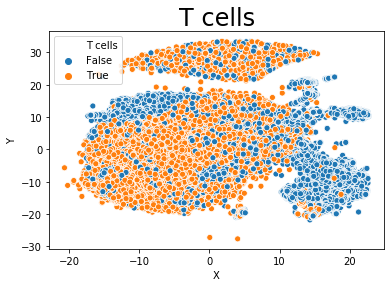

In [4]:

df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'T cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'CD8 Cytotoxic T cells')

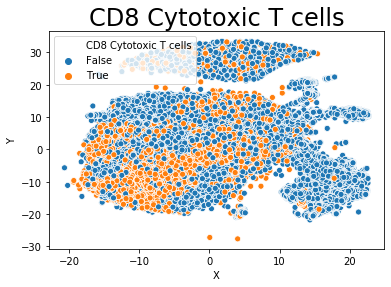

In [5]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'CD8 Cytotoxic T cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'B cells')

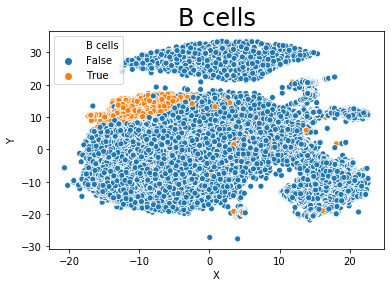

In [6]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'B cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'Activated T cells')

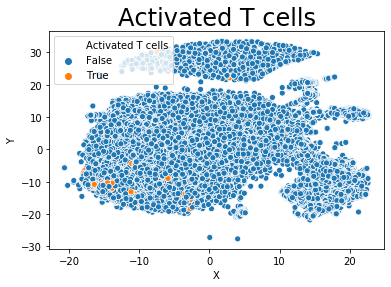

In [9]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'Activated T cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

In [ ]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'NK cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, '4 clusters')

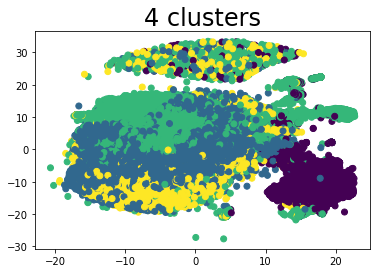

In [32]:
k = 4
path = fr'/storage/md_keren/shitay/outputs/kmeans/row_kmeans/kmeans_immune_cells_var0.315_k_{k}.pkl'

kmeans = pickle.load(open(path, 'rb'))
len(kmeans['clusters'][0])

# Set colors with clusters
cluster_colors = np.zeros(filtered_cells.number_of_cells)
for cluster_idx, cluster_list in enumerate(kmeans['clusters']):
    cluster_colors[cluster_list] = cluster_idx
    
plt.pyplot.scatter(cells_embedded[:,0], cells_embedded[:,1], c=cluster_colors)
plt.pyplot.title(f"{k} clusters", size=24)

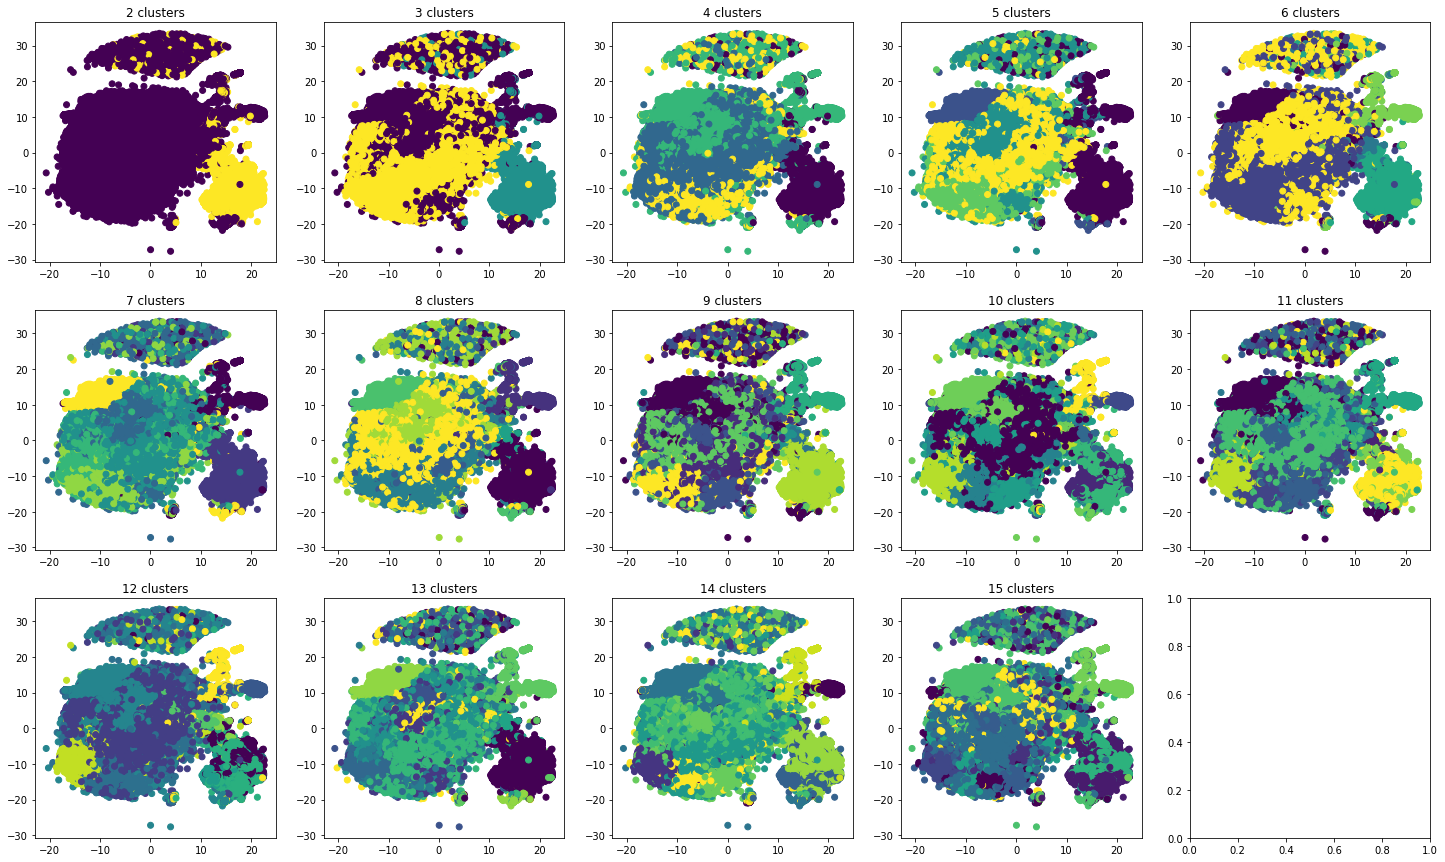

In [42]:
fig, axs = plt.pyplot.subplots(3, 5)
fig.set_size_inches(25, 15)

i = 0
j = 0
for k in range(2, 16):
       
    path = fr'/storage/md_keren/shitay/outputs/kmeans/row_kmeans/kmeans_immune_cells_var0.315_k_{k}.pkl'
    kmeans = pickle.load(open(path, 'rb'))

    # Set colors with clusters
    cluster_colors = np.zeros(filtered_cells.number_of_cells)
    for cluster_idx, cluster_list in enumerate(kmeans['clusters']):
        cluster_colors[cluster_list] = cluster_idx

    axs[i][j].scatter(cells_embedded[:,0], cells_embedded[:,1], c=cluster_colors)
    axs[i][j].set_title(f"{k} clusters")

    if j==4:
        j=0
        i += 1
    else:
        j+=1
        
#     plt.pyplot.title(f"{k} clusters", size=24)

Text(0.5, 1.0, 'clusters')

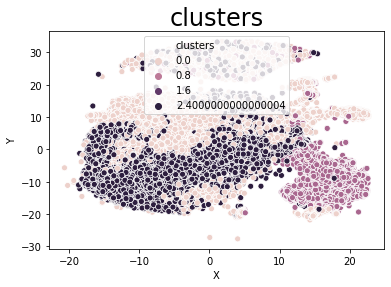

In [25]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
df['clusters'] = cluster_colors
lm = sns.scatterplot(x="X", y="Y",
              hue='clusters',
              data=df)
plt.pyplot.title(f"clusters", size=24)

In [54]:
k = 12
path = fr'/storage/md_keren/shitay/outputs/kmeans/row_kmeans/kmeans_immune_cells_var0.315_k_{k}.pkl'
kmeans = pickle.load(open(path, 'rb'))

# Set colors with clusters
cluster_colors = np.zeros(filtered_cells.number_of_cells)
for cluster_idx, cluster_list in enumerate(kmeans['clusters']):
    cluster_colors[cluster_list] = cluster_idx


In [55]:
[len(ii) for ii in kmeans['clusters']]

[3527, 5, 19041, 3083, 13309, 24460, 5080, 5009, 3166, 1026, 6521, 4797]